
# **Consumer Lending Risk Insights Through Data - Driven Analytics**

###Prashant Gupta
###PRN: 250840325052

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the necessary Libraries



In [35]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from numpy.linalg import inv
from numpy import random
import os
import scipy
from scipy import stats
from scipy.stats import  binom, poisson
from scipy.stats import expon
from scipy.stats import norm,t
from scipy.stats import rv_discrete
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels
from scipy import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.rates import test_poisson_2indep
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show,title,xlabel,ylabel
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



Loading the Dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Case Study/credit_risk_applicants.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.shape

(307511, 122)

Cleaning the Dataset 1



In [7]:
# Checking for overall null values.
df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [8]:
# Taking only the necessary columns from the dataset
columns = [
    "TARGET",
    "CODE_GENDER",
    "DAYS_BIRTH",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_EMPLOYED",
    "OCCUPATION_TYPE",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3"

]
df[columns].isna().sum()

,0
TARGET,0
CODE_GENDER,0
DAYS_BIRTH,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
CNT_CHILDREN,0
CNT_FAM_MEMBERS,2
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [9]:
df[columns].head()

,TARGET,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,OCCUPATION_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,M,-9461,Secondary / secondary special,Single / not married,0,1.0,202500.0,406597.5,24700.5,351000.0,-637,Laborers,N,Y,0.083037,0.262949,0.139376
1,0,F,-16765,Higher education,Married,0,2.0,270000.0,1293502.5,35698.5,1129500.0,-1188,Core staff,N,N,0.311267,0.622246,NaN
2,0,M,-19046,Secondary / secondary special,Single / not married,0,1.0,67500.0,135000.0,6750.0,135000.0,-225,Laborers,Y,Y,NaN,0.555912,0.729567
3,0,F,-19005,Secondary / secondary special,Civil marriage,0,2.0,135000.0,312682.5,29686.5,297000.0,-3039,Laborers,N,Y,NaN,0.650442,NaN
4,0,M,-19932,Secondary / secondary special,Single / not married,0,1.0,121500.0,513000.0,21865.5,513000.0,-3038,Core staff,N,Y,NaN,0.322738,NaN


In [10]:
df[columns].duplicated().sum()

np.int64(0)

In [11]:
df[columns].select_dtypes("number")

,TARGET,DAYS_BIRTH,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,-9461,0,1.0,202500.0,406597.5,24700.5,351000.0,-637,0.083037,0.262949,0.139376
1,0,-16765,0,2.0,270000.0,1293502.5,35698.5,1129500.0,-1188,0.311267,0.622246,NaN
2,0,-19046,0,1.0,67500.0,135000.0,6750.0,135000.0,-225,NaN,0.555912,0.729567
3,0,-19005,0,2.0,135000.0,312682.5,29686.5,297000.0,-3039,NaN,0.650442,NaN
4,0,-19932,0,1.0,121500.0,513000.0,21865.5,513000.0,-3038,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,-9327,0,1.0,157500.0,254700.0,27558.0,225000.0,-236,0.145570,0.681632,NaN
307507,0,-20775,0,1.0,72000.0,269550.0,12001.5,225000.0,365243,NaN,0.115992,NaN
307508,0,-14966,0,1.0,153000.0,677664.0,29979.0,585000.0,-7921,0.744026,0.535722,0.218859
307509,1,-11961,0,2.0,171000.0,370107.0,20205.0,319500.0,-4786,NaN,0.514163,0.661024


In [12]:
cols=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3']

# Initialize a master boolean mask, assuming all rows are valid initially
valid_rows_mask = pd.Series(True, index=df.index)

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a boolean Series for the current column: True if not an outlier or is NaN
    # A row is considered valid for this column if its value is within the bounds OR is NaN
    current_col_condition = (df[col].isna()) | ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    # Update the master mask: a row is kept only if it satisfies the condition for ALL columns processed so far
    valid_rows_mask = valid_rows_mask & current_col_condition

# Apply the filtered mask to the DataFrame once outside the loop
df = df[valid_rows_mask]

REPLACING THE NULL VALUES IN THE NUMERIC COULMNS WITH THEIR MEDIANS

In [13]:
cols=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
for col in cols:
  df[col]=df[col].fillna(df[col].median())

In [14]:
df[columns].isna().sum()

,0
TARGET,0
CODE_GENDER,0
DAYS_BIRTH,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
CNT_CHILDREN,0
CNT_FAM_MEMBERS,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


NOW CONVERTING THE DAYS_BIRTH COLUMN IS IN DAYS, CONVERTING IT TO YEARS AND REMOVING THAT NEGATIVE SIGN

In [15]:
df['AGE_YEARS'] = (df['DAYS_BIRTH']) / 365
df['AGE_YEARS'] = abs(df['AGE_YEARS'].round(1))
df['DAYS_BIRTH']= abs(df['DAYS_BIRTH'])
df.head()
df[['AGE_YEARS','DAYS_BIRTH']]

,AGE_YEARS,DAYS_BIRTH
0,25.9,9461
1,45.9,16765
2,52.2,19046
3,52.1,19005
4,54.6,19932
...,...,...
307506,25.6,9327
307507,56.9,20775
307508,41.0,14966
307509,32.8,11961


HERE THE EMPLOYEMENT DETAILS WERE ALSO IN DAYS CONVERTING IT TO YEARS AND THE VALUE 365243 = 1000 YEARS WHICH IS ABSURD SO WE ARE REPLACING IT WITH NULL

In [16]:
df['DAYS_EMPLOYED']= abs(df['DAYS_EMPLOYED'])
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['EMPLOYED_YEARS'] = (df['DAYS_EMPLOYED']) / 365
df[['EMPLOYED_YEARS','DAYS_EMPLOYED']]

,EMPLOYED_YEARS,DAYS_EMPLOYED
0,1.745205,637.0
1,3.254795,1188.0
2,0.616438,225.0
3,8.326027,3039.0
4,8.323288,3038.0
...,...,...
307506,0.646575,236.0
307507,NaN,NaN
307508,21.701370,7921.0
307509,13.112329,4786.0


Loading and cleaning the Dataset 2

In [17]:
dfprev=pd.read_csv("/content/drive/MyDrive/Case Study/credit_risk_previous_loans.csv")

In [18]:
pd.set_option("display.max_columns",None)

In [19]:
dfprev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfprev.shape

(1670214, 37)

In [21]:
dfprev.isna().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [22]:
columns = [
    "NAME_CONTRACT_STATUS",
    "AMT_CREDIT",
    "AMT_APPLICATION",
    "AMT_DOWN_PAYMENT",
    "CNT_PAYMENT",
    "NAME_CASH_LOAN_PURPOSE",
    "DAYS_DECISION"
]

In [23]:
cols = ['AMT_DOWN_PAYMENT','CNT_PAYMENT','RATE_INTEREST_PRIMARY']

for col in cols:
    Q1 = dfprev[col].quantile(0.25)
    Q3 = dfprev[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dfprev = dfprev[
        dfprev[col].isna() |
        ((dfprev[col] >= lower_bound) & (dfprev[col] <= upper_bound))
    ]

In [24]:
numcol = dfprev.select_dtypes(include=[np.number]).columns
catcol = dfprev.select_dtypes(exclude=[np.number]).columns

for col in numcol:
    dfprev[col].fillna(dfprev[col].median(), inplace=True)

for col in catcol:
    dfprev[col].fillna(dfprev[col].mode()[0], inplace=True)

Merging both of the datasets i.e current and past on the basis of SK_ID_CURR as it is present in both of the datasets

In [25]:
dfprev['REFUSED_FLAG'] = (dfprev['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)

refusal = dfprev.groupby('SK_ID_CURR')['REFUSED_FLAG'].max().reset_index()
refusal.rename(columns={'REFUSED_FLAG':'HAS_PREV_REFUSAL'}, inplace=True)

df = df.merge(refusal, on='SK_ID_CURR', how='left')
df['HAS_PREV_REFUSAL'] = df['HAS_PREV_REFUSAL'].fillna(0).astype(int)

df[['SK_ID_CURR','HAS_PREV_REFUSAL']].head()


,SK_ID_CURR,HAS_PREV_REFUSAL
0,100002,0
1,100003,0
2,100004,0
3,100006,1
4,100007,0


# UNIVARIATE ANALYSIS

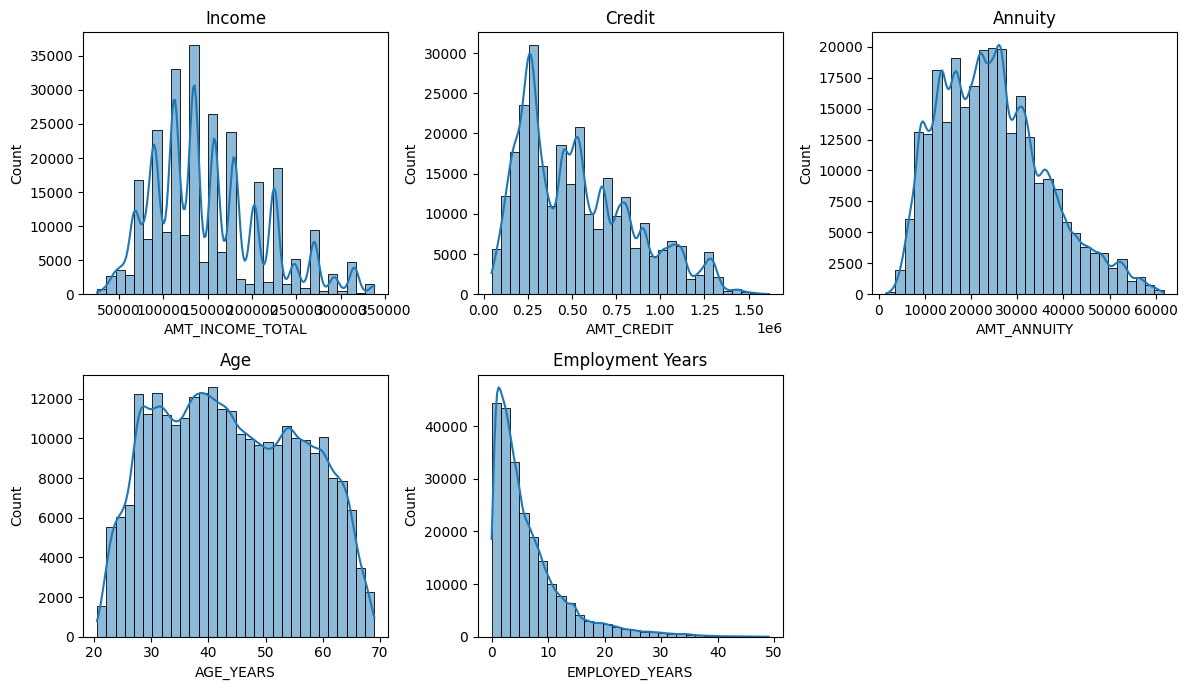

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# 1st row
sns.histplot(df['AMT_INCOME_TOTAL'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Income")

sns.histplot(df['AMT_CREDIT'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Credit")

sns.histplot(df['AMT_ANNUITY'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Annuity")

# 2nd row
sns.histplot(df['AGE_YEARS'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Age")

sns.histplot(df['EMPLOYED_YEARS'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Employment Years")

# Hide the last empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS

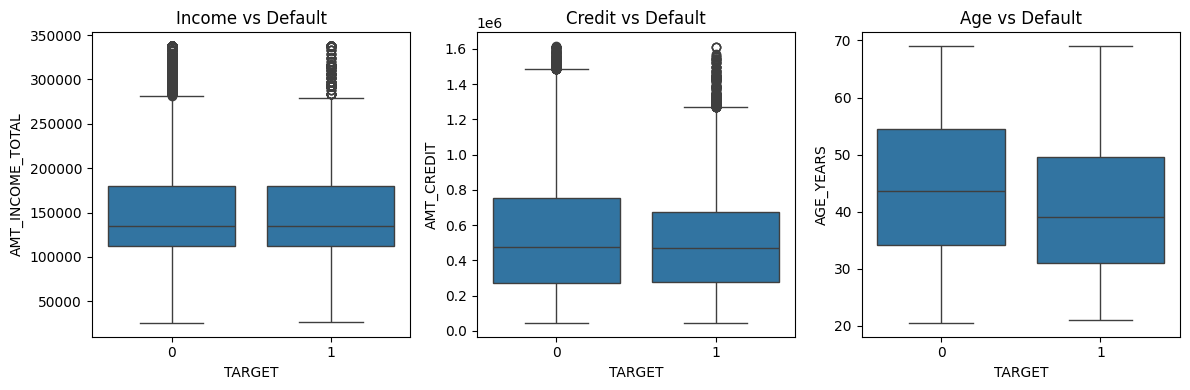

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df, ax=axes[0])
axes[0].set_title("Income vs Default")

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df, ax=axes[1])
axes[1].set_title("Credit vs Default")

sns.boxplot(x='TARGET', y='AGE_YEARS', data=df, ax=axes[2])
axes[2].set_title("Age vs Default")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Gender')

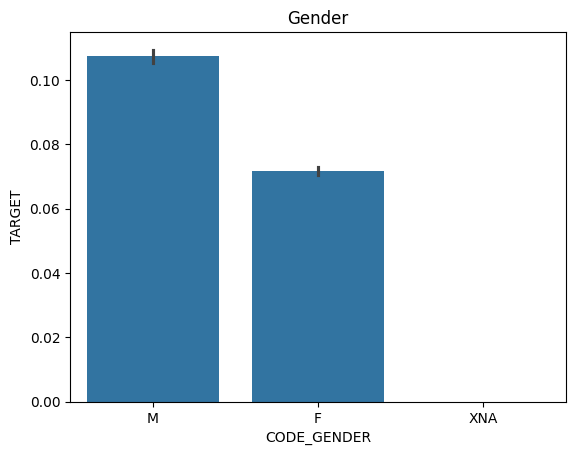

In [28]:
sns.barplot(x='CODE_GENDER',y='TARGET',data=df)
plt.title("Gender")

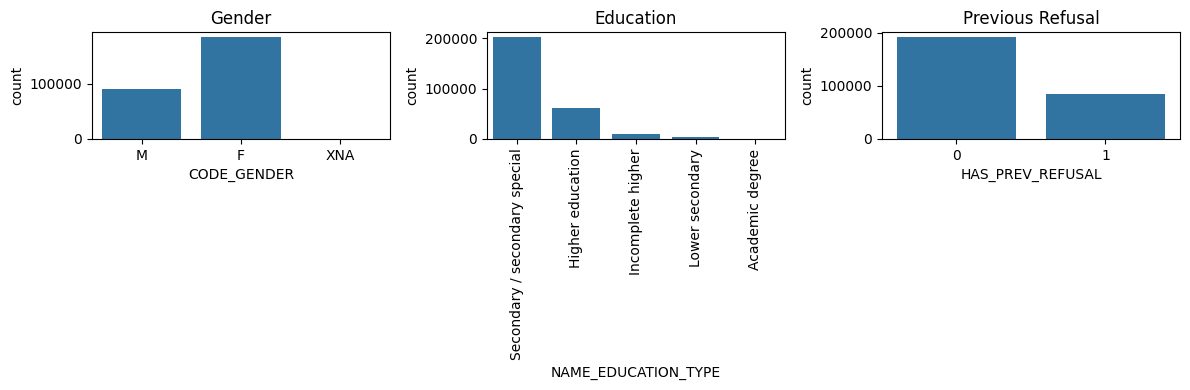

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x='CODE_GENDER', data=df, ax=axes[0])
axes[0].set_title("Gender")

sns.countplot(x='NAME_EDUCATION_TYPE', data=df, ax=axes[1])
axes[1].set_title("Education")
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(x='HAS_PREV_REFUSAL', data=df, ax=axes[2])
axes[2].set_title("Previous Refusal")

plt.tight_layout()
plt.show()


# MULTIVARIATE ANALYSIS

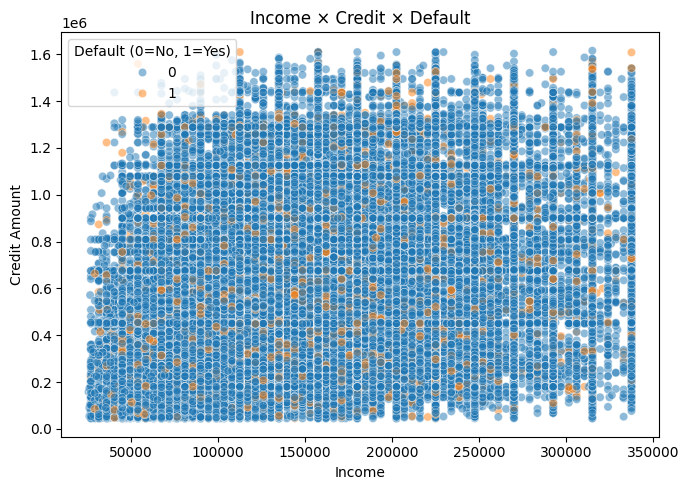

In [30]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    x='AMT_INCOME_TOTAL',
    y='AMT_CREDIT',
    hue='TARGET',
    data=df,
    alpha=0.5
)

plt.title("Income × Credit × Default")
plt.xlabel("Income")
plt.ylabel("Credit Amount")
plt.legend(title="Default (0=No, 1=Yes)")
plt.tight_layout()
plt.show()


AS SCATTER PLOT IS NOT CLEARLY UNDERSTANDABLE A HEATMAP WILL GIVE AS MORE INSIGHTS

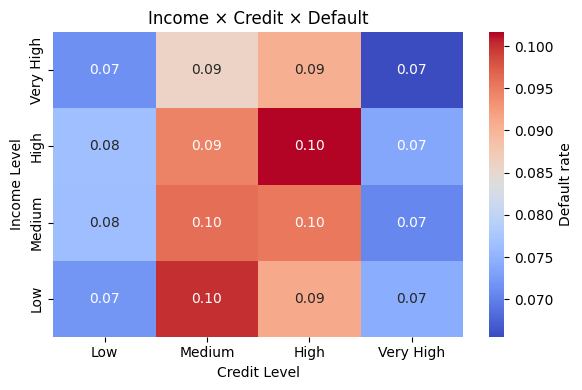

In [43]:
order = ['Low', 'Medium', 'High', 'Very High']
df['INCOME_BIN'] = pd.qcut(df['AMT_INCOME_TOTAL'], 4, labels=order)
df['CREDIT_BIN'] = pd.qcut(df['AMT_CREDIT'], 4, labels=order)

pivot = pd.pivot_table(
    df,
    values='TARGET',
    index='INCOME_BIN',
    columns='CREDIT_BIN',
    aggfunc='mean'
).reindex(index=order, columns=order)

pivot = pivot.fillna(0)
plt.figure(figsize=(6,4))
ax = sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Default rate'})
ax.invert_yaxis()
plt.title("Income × Credit × Default")
plt.xlabel("Credit Level")
plt.ylabel("Income Level")
plt.tight_layout()
plt.show()

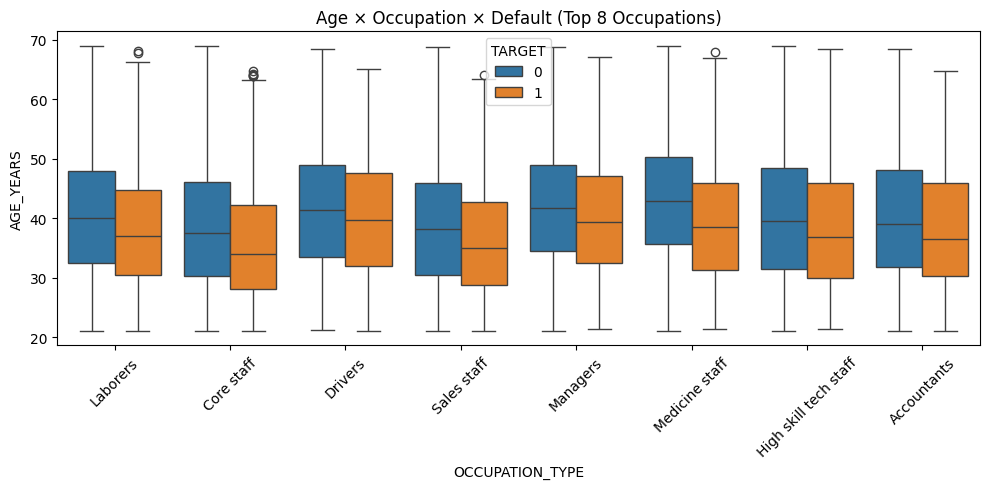

In [32]:
top_occ = df['OCCUPATION_TYPE'].value_counts().head(8).index
df_occ_small = df[df['OCCUPATION_TYPE'].isin(top_occ)]

plt.figure(figsize=(10, 5))
sns.boxplot(
    x='OCCUPATION_TYPE',
    y='AGE_YEARS',
    hue='TARGET',
    data=df_occ_small
)

plt.xticks(rotation=45)
plt.title("Age × Occupation × Default (Top 8 Occupations)")
plt.tight_layout()
plt.show()


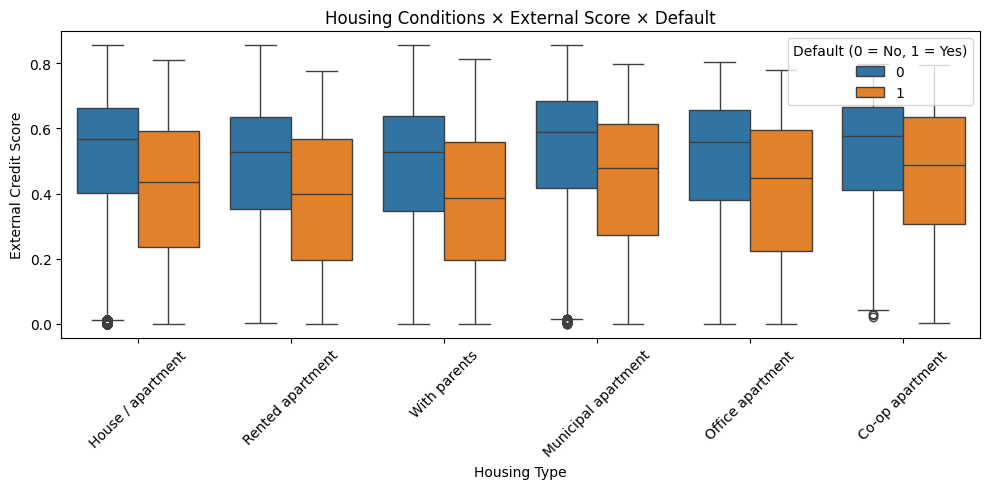

In [33]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='NAME_HOUSING_TYPE',
    y='EXT_SOURCE_2',
    hue='TARGET',
    data=df
)

plt.xticks(rotation=45)
plt.title("Housing Conditions × External Score × Default")
plt.xlabel("Housing Type")
plt.ylabel("External Credit Score")
plt.legend(title="Default (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()


# HYPOTHESIS TESTING

TEST 1 - Do defaulters have significantly lower income than non-defaulters?

H₀ (Null):
Mean income of defaulters = Mean income of non-defaulters

H₁ (Alternate):
Mean income of defaulters ≠ Mean income of non-defaulters


In [36]:
income_def = df[df['TARGET'] == 1]['AMT_INCOME_TOTAL']
income_non = df[df['TARGET'] == 0]['AMT_INCOME_TOTAL']

t_stat, p_val = stats.ttest_ind(income_def, income_non, equal_var=False)

print("=== Test 1: Income vs Default (T-Test) ===")
print("Mean income (Defaulters):     ", round(income_def.mean(), 2))
print("Mean income (Non-Defaulters): ", round(income_non.mean(), 2))
print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Income is significantly different between defaulters and non-defaulters.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in income.")


=== Test 1: Income vs Default (T-Test) ===
Mean income (Defaulters):      149397.62
Mean income (Non-Defaulters):  151193.77
T-statistic: -4.323354925907501
p-value: 1.5420931168114517e-05
Conclusion: Reject H0 → Income is significantly different between defaulters and non-defaulters.


TEST 2 – Is the default rate different across genders?

H₀: Default is independent of gender

H₁: Default depends on gender

In [37]:
# Contingency table: gender vs default
gender_table = pd.crosstab(df['CODE_GENDER'], df['TARGET'])

chi2, p_val, dof, expected = stats.chi2_contingency(gender_table)

print("\n=== Test 2: Gender vs Default (Chi-Square) ===")
print("Contingency table:")
print(gender_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Default rate is different across genders.")
else:
    print("Conclusion: Fail to reject H0 → No strong evidence that default rate differs by gender.")



=== Test 2: Gender vs Default (Chi-Square) ===
Contingency table:
TARGET            0      1
CODE_GENDER               
F            171134  13225
M             81276   9778
XNA               4      0
Chi-square statistic: 1012.4684470441044
p-value: 1.397237309492836e-220
Conclusion: Reject H0 → Default rate is different across genders.


TEST 3 – Do previous loan rejections predict higher current default probability?

H₀: Previous loan refusals are independent of current default

H₁: Previous loan refusals are related to current default

In [38]:
prev_table = pd.crosstab(df['HAS_PREV_REFUSAL'], df['TARGET'])

chi2, p_val, dof, expected = stats.chi2_contingency(prev_table)

print("\n=== Test 4: Previous Refusal vs Default (Chi-Square) ===")
print("Contingency table:")
print(prev_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Previous loan refusals are related to higher current default risk.")
else:
    print("Conclusion: Fail to reject H0 → Previous refusals do not significantly affect current default risk.")



=== Test 4: Previous Refusal vs Default (Chi-Square) ===
Contingency table:
TARGET                 0      1
HAS_PREV_REFUSAL               
0                 176937  13987
1                  75477   9016
Chi-square statistic: 855.620007293878
p-value: 4.362843200837823e-188
Conclusion: Reject H0 → Previous loan refusals are related to higher current default risk.


TEST 4 - Is the average age of defaulters significantly different from the average age of non-defaulters?

H₀ (Null):
Mean age of defaulters = Mean age of non-defaulters

H₁ (Alternate):
Mean age of defaulters ≠ Mean age of non-defaulters

In [39]:
# Age of defaulters and non-defaulters
age_def = df[df['TARGET'] == 1]['AGE_YEARS']
age_non = df[df['TARGET'] == 0]['AGE_YEARS']

t_stat, p_val = stats.ttest_ind(age_def, age_non, equal_var=False)

print("=== Test: Age vs Default (T-Test) ===")
print("Mean age (Defaulters):     ", round(age_def.mean(), 2))
print("Mean age (Non-Defaulters): ", round(age_non.mean(), 2))
print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Age is significantly different between defaulters and non-defaulters.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in age.")


=== Test: Age vs Default (T-Test) ===
Mean age (Defaulters):      40.74
Mean age (Non-Defaulters):  44.3
T-statistic: -44.37790219329761
p-value: 0.0
Conclusion: Reject H0 → Age is significantly different between defaulters and non-defaulters.


TEST 5 – Is the average installment amount significantly different between defaulters and non-defaulters?

H₀: Mean annuity (EMI) of defaulters = Mean annuity of non-defaulters

H₁: Mean annuity (EMI) of defaulters ≠ Mean annuity of non-defaulters

> Add blockquote



In [40]:
ann_def = df[df['TARGET'] == 1]['AMT_ANNUITY']
ann_non = df[df['TARGET'] == 0]['AMT_ANNUITY']

t_stat, p_val = stats.ttest_ind(ann_def, ann_non, equal_var=False)

print("\n=== Test: Annuity vs Default (T-Test) ===")
print("Mean annuity (Defaulters):     ", round(ann_def.mean(), 2))
print("Mean annuity (Non-Defaulters): ", round(ann_non.mean(), 2))
print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Annuity is significantly different between defaulters and non-defaulters.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in annuity.")



=== Test: Annuity vs Default (T-Test) ===
Mean annuity (Defaulters):      25216.3
Mean annuity (Non-Defaulters):  24650.64
T-statistic: 7.49091963011304
p-value: 7.042435586505227e-14
Conclusion: Reject H0 → Annuity is significantly different between defaulters and non-defaulters.


TEST 6 - Is the average credit amount significantly different between defaulters and non-defaulters?

H₀: Mean credit amount of defaulters = Mean credit amount of non-defaulters

H₁: Mean credit amount of defaulters ≠ Mean credit amount of non-defaulters

In [41]:
credit_def = df[df['TARGET'] == 1]['AMT_CREDIT']
credit_non = df[df['TARGET'] == 0]['AMT_CREDIT']

t_stat, p_val = stats.ttest_ind(credit_def, credit_non, equal_var=False)

print("\n=== Test: Credit Amount vs Default (T-Test) ===")
print("Mean credit (Defaulters):     ", round(credit_def.mean(), 2))
print("Mean credit (Non-Defaulters): ", round(credit_non.mean(), 2))
print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 → Credit amount is significantly different between defaulters and non-defaulters.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in credit amount.")



=== Test: Credit Amount vs Default (T-Test) ===
Mean credit (Defaulters):      521516.16
Mean credit (Non-Defaulters):  532618.46
T-statistic: -5.428762436738443
p-value: 5.721400316596999e-08
Conclusion: Reject H0 → Credit amount is significantly different between defaulters and non-defaulters.


# **Final Insights & Business Recommendations Based on Analysis**
1. Stricter Approval Criteria for High-Risk Borrower Segments -

- Applicants with low income and high Credit-to-Income ratio show significantly higher default probability.
- -> Implement stricter affordability checks for Credit-to-Income > 5x.

- Applicants with short employment history (<1 year) or frequent job changes are more likely to default.
- → Require additional employment validation or co-applicant for unstable profiles.

- Young borrowers (<25 yrs) in manual/service occupations show higher delinquency.
- → Tighten credit limits, request guarantor, or cap loan amount.

**Business Impact**: Helps reduce exposure to financially unstable customers.

2. Use Previous Loan Behaviour & External Scores in Risk Scoring

- Customers with past loan refusals have significantly higher default rates.
- → Add rejection history as a penalty factor in credit scoring.

- External bureau scores (EXT_SOURCE_1/2/3) show strong negative correlation with default.
- → Higher score → lower default risk → approve with confidence.
- → Lower score → apply stricter checks / reduced loan size / higher interest.

**Business Impact**: Reduces moral hazard by penalizing historically risky borrowers.

3. Implement Risk-Based Pricing Model

- Offer lower interest rates to low-risk customers (high income, high bureau score, stable job).

- Charge higher interest rates to compensate risk for borderline or medium-risk applicants.

- Tier-based pricing example:

**Business Impact**: Improves profitability while still allowing business growth.

4. Credit Limit & Loan Tenure Policy

- Cap credit sanctioned at 3–4x of annual income for medium-risk borrowers.

- For high-risk profiles:
- → Reduce loan amount OR shorten tenure to reduce long-term exposure.

- Provide longer tenure or higher limits only for low-risk customers.

**Business Impact**: Prevents over-leveraging and improves repayment stability.

5. Customer Engagement, Monitoring & Early-Warning Triggers

- Educate high-risk groups through budgeting tips, EMI reminders, automated SMS alerts.

- Track changes in external score, missed payments, delinquent behavior.
- → Trigger proactive intervention (follow-up call, restructuring offer).

- High-risk customers should be placed under enhanced monitoring bucket.

**Business Impact**: Reduces NPA formation and improves recovery rates.